In [1]:
import pandas as pd
import seaborn as sns

In [2]:
def clean_df(df):
  df1 = df['Unnamed: 0_level_0']
  df1 = df1.merge(df['Unnamed: 1_level_0'], left_index=True, right_index=True)
  df1 = df1.merge(df['Unnamed: 3_level_0'], left_index=True, right_index=True)
  df1 = df1.merge(df['Unnamed: 4_level_0'], left_index=True, right_index=True)
  df1 = df1.merge(df['Games'], left_index=True, right_index=True)
  df1 = df1.merge(df['Fantasy'], left_index=True, right_index=True)
  df1 = df1[df1.Rk != 'Rk']
  df1['Player'] = [name.strip('+*') for name in df1.Player]
  df1 = df1.drop(columns=['FantPt', 'DKPt', 'FDPt', 'PosRank','OvRank'])
  df1 = df1.reset_index(drop=True)
  df1.fillna(0, inplace=True)
  df1 = df1.astype({'Rk' : 'int',
              'Player' : 'object',
              'FantPos' : 'object',
              'Age' : 'int',
              'G' : 'int',
              'GS' : 'int',
              'PPR' : 'float',
              'VBD' : 'float'})
  df2 = pd.get_dummies(df1.FantPos, prefix='FantPos')
  df1 = df1.merge(df2, left_index=True, right_index=True)
  df1.drop(columns=['FantPos'],  inplace=True)
  df1.rename(columns={'FantPos_0' : 'FantPos_Other'}, inplace=True)
  return df1

In [3]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
pfrs = []
for yr in years:
  df = pd.read_html(f'https://www.pro-football-reference.com/years/{yr}/fantasy.htm#fantasy')[0]
  df = clean_df(df)
  pfrs.append(df)

In [4]:
for i,pfr in enumerate(pfrs[:-1]):
  pfr_nxt = pfrs[i+1]
  df_nxt = pfr_nxt[['Rk', 'Player']]
  pfrs[i] = pfr.merge(df_nxt, on='Player', how='left')
  pfrs[i].rename(columns={'Rk_x' : 'Rk', 'Rk_y' : 'NextRk'}, inplace=True)
  pfrs[i].dropna(inplace=True)

In [5]:
test = pfrs[-2]
train = pd.DataFrame()
for i, pfr in enumerate(pfrs[:-2]):
  train = pd.concat([train, pfr], ignore_index=True)

train.shape

(4935, 13)

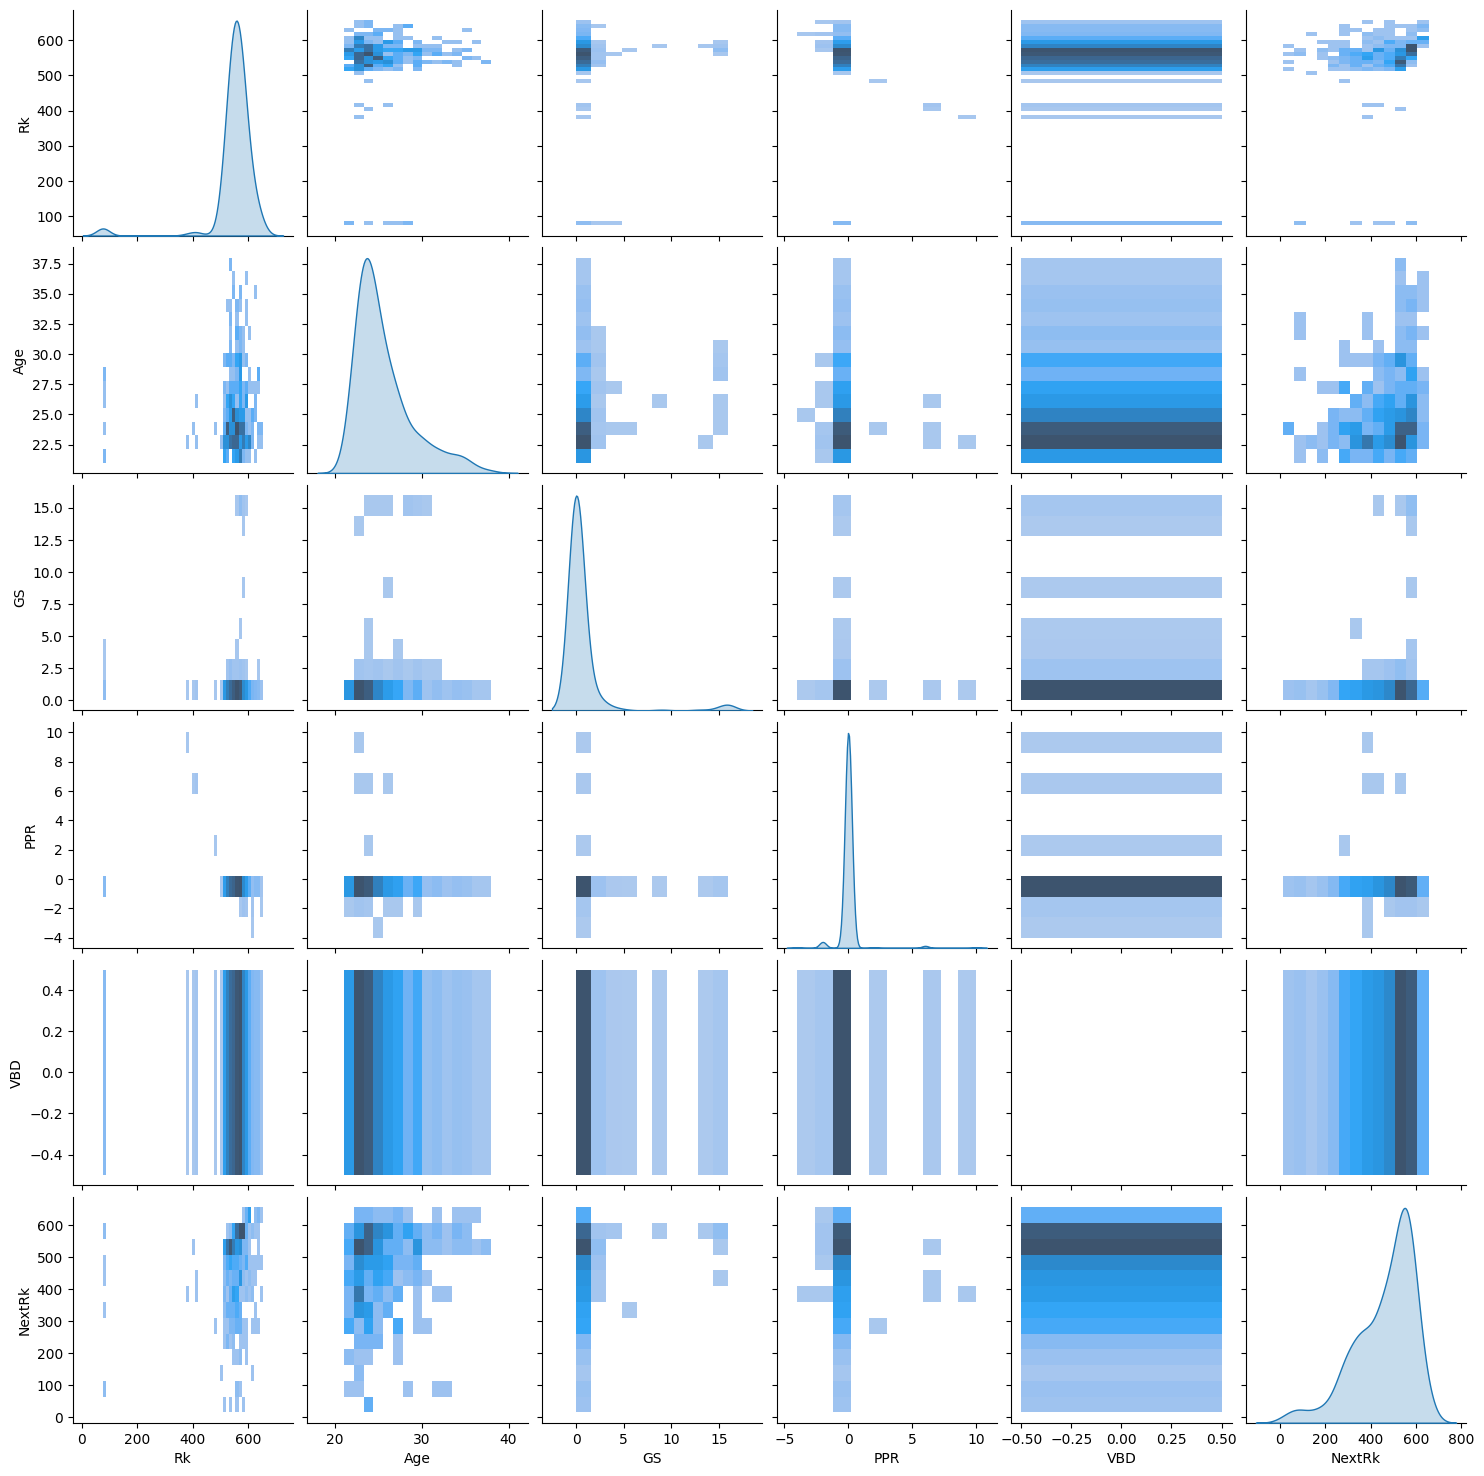

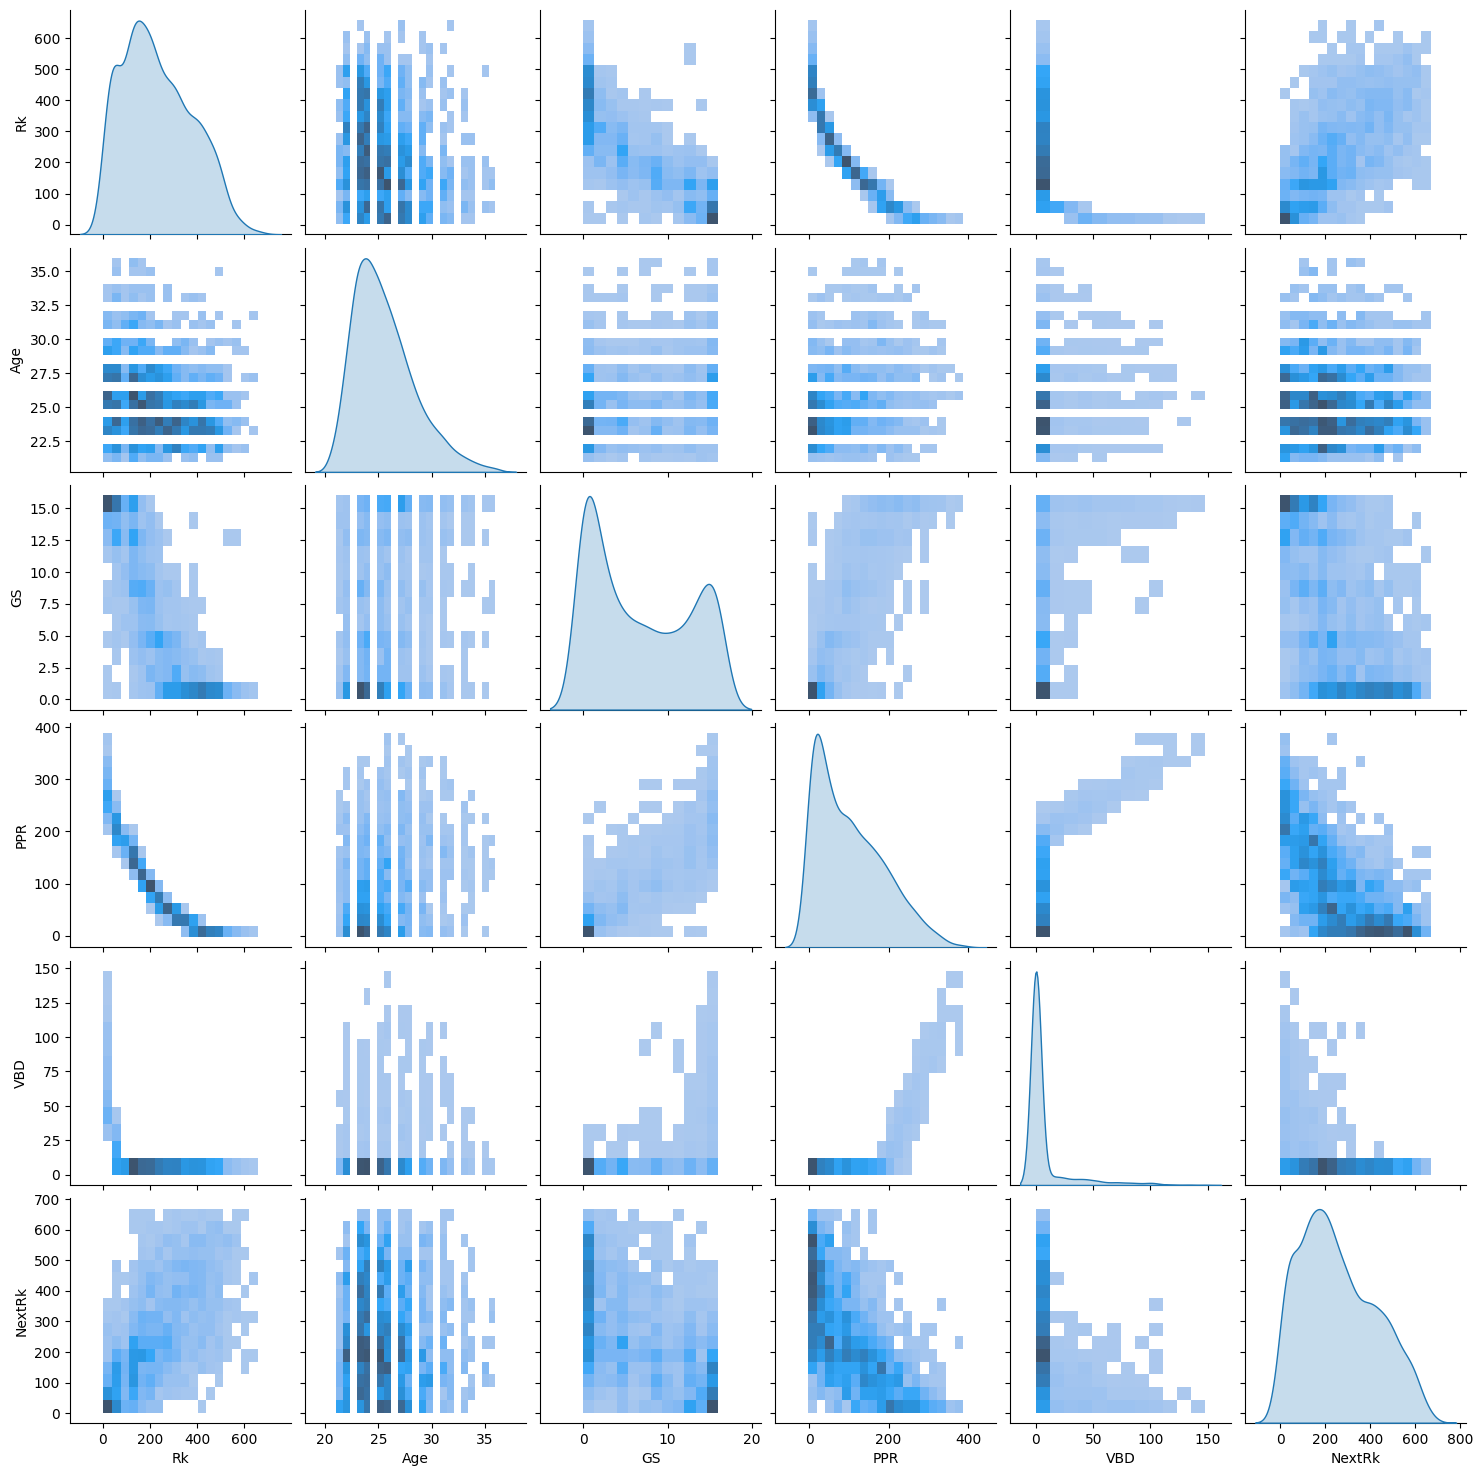

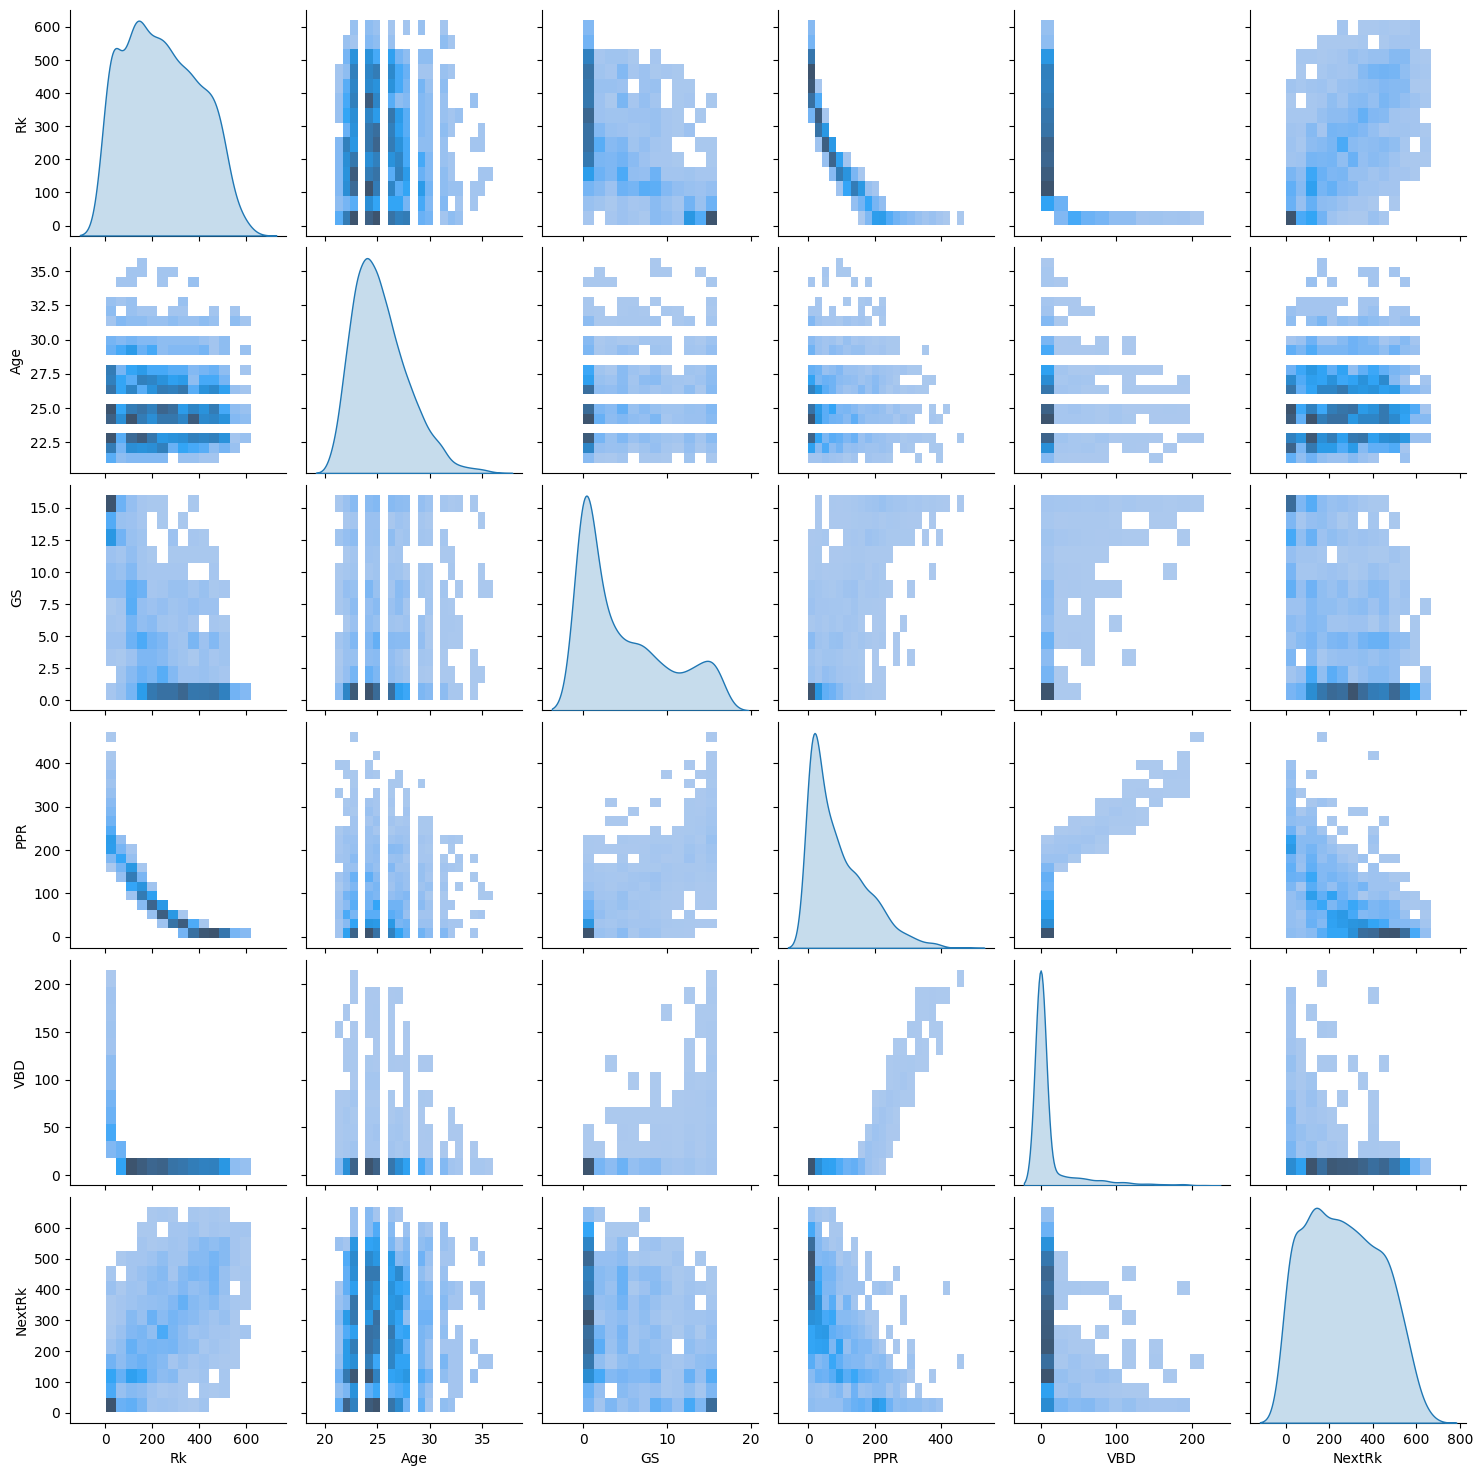

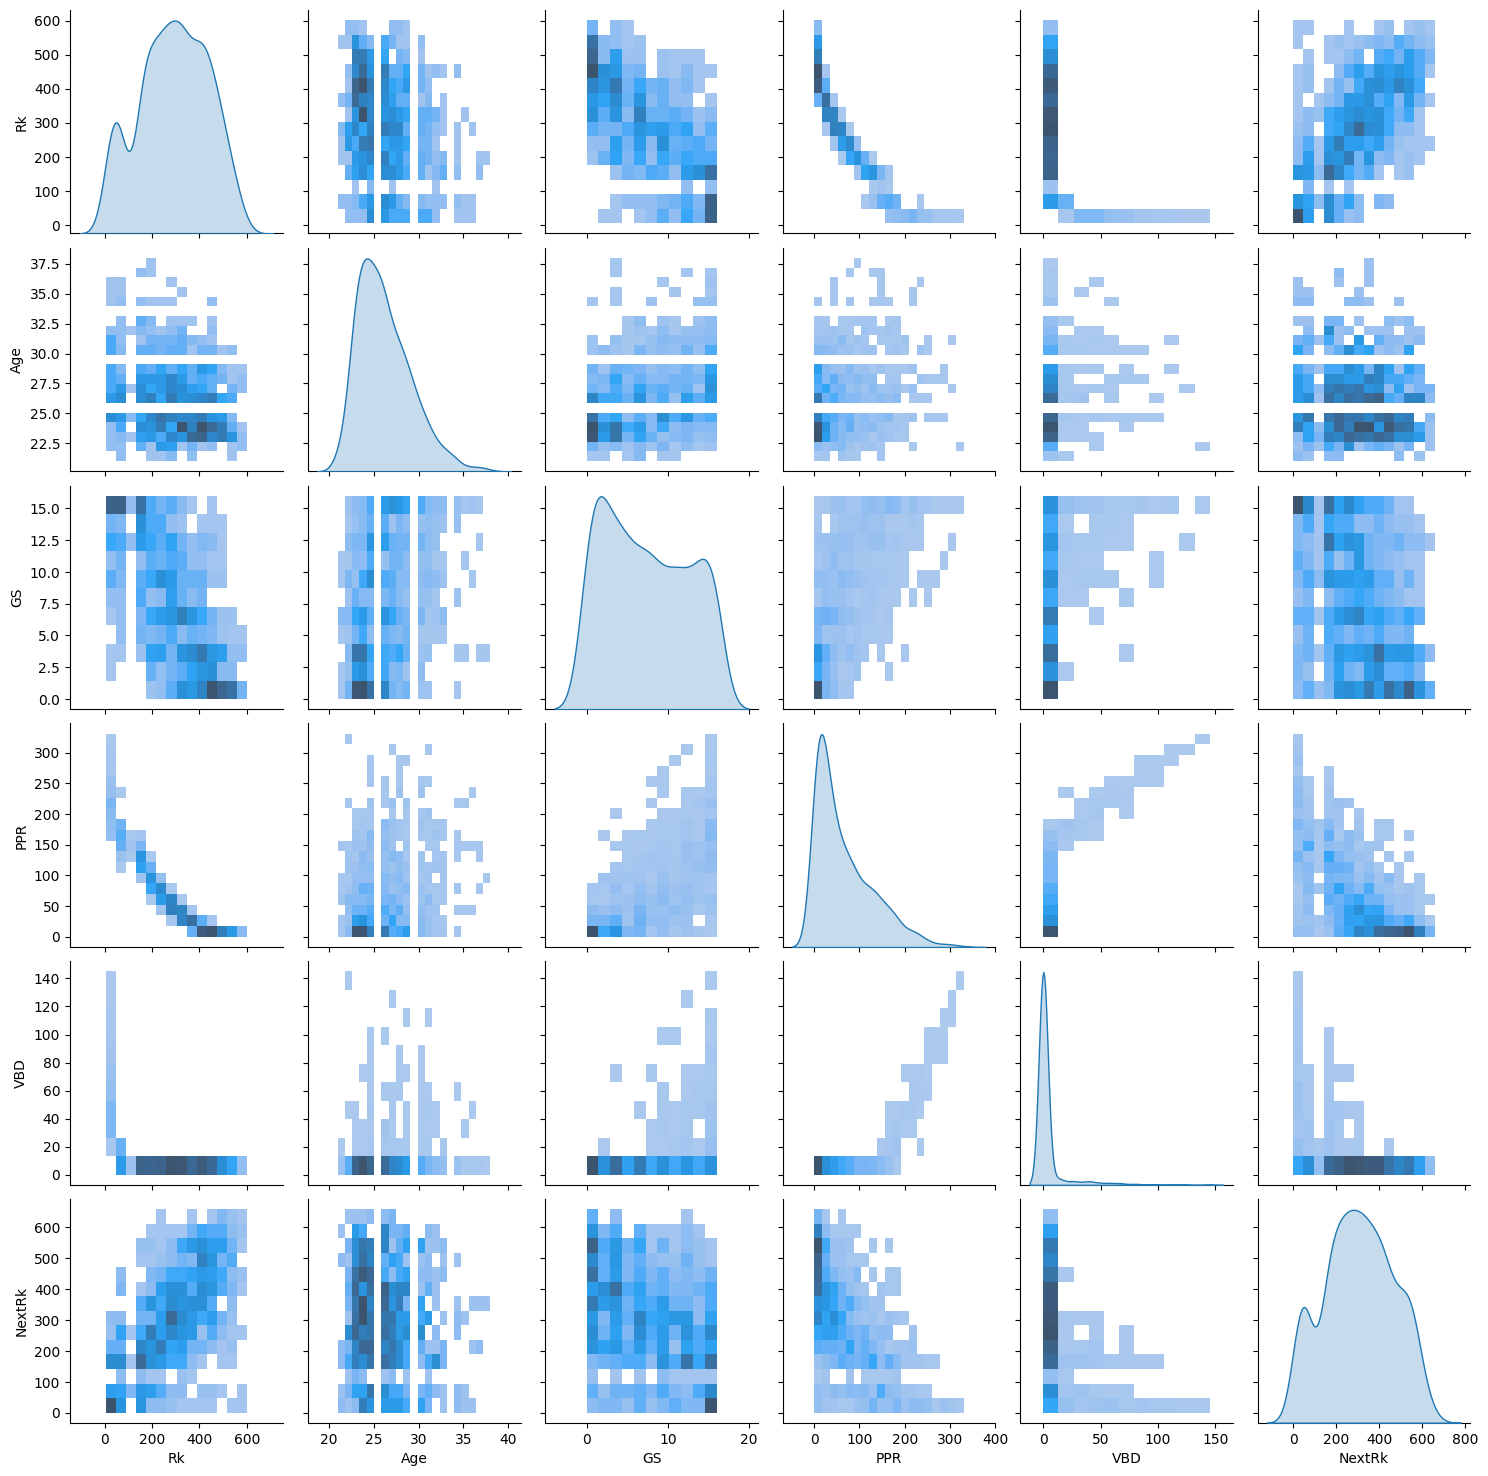

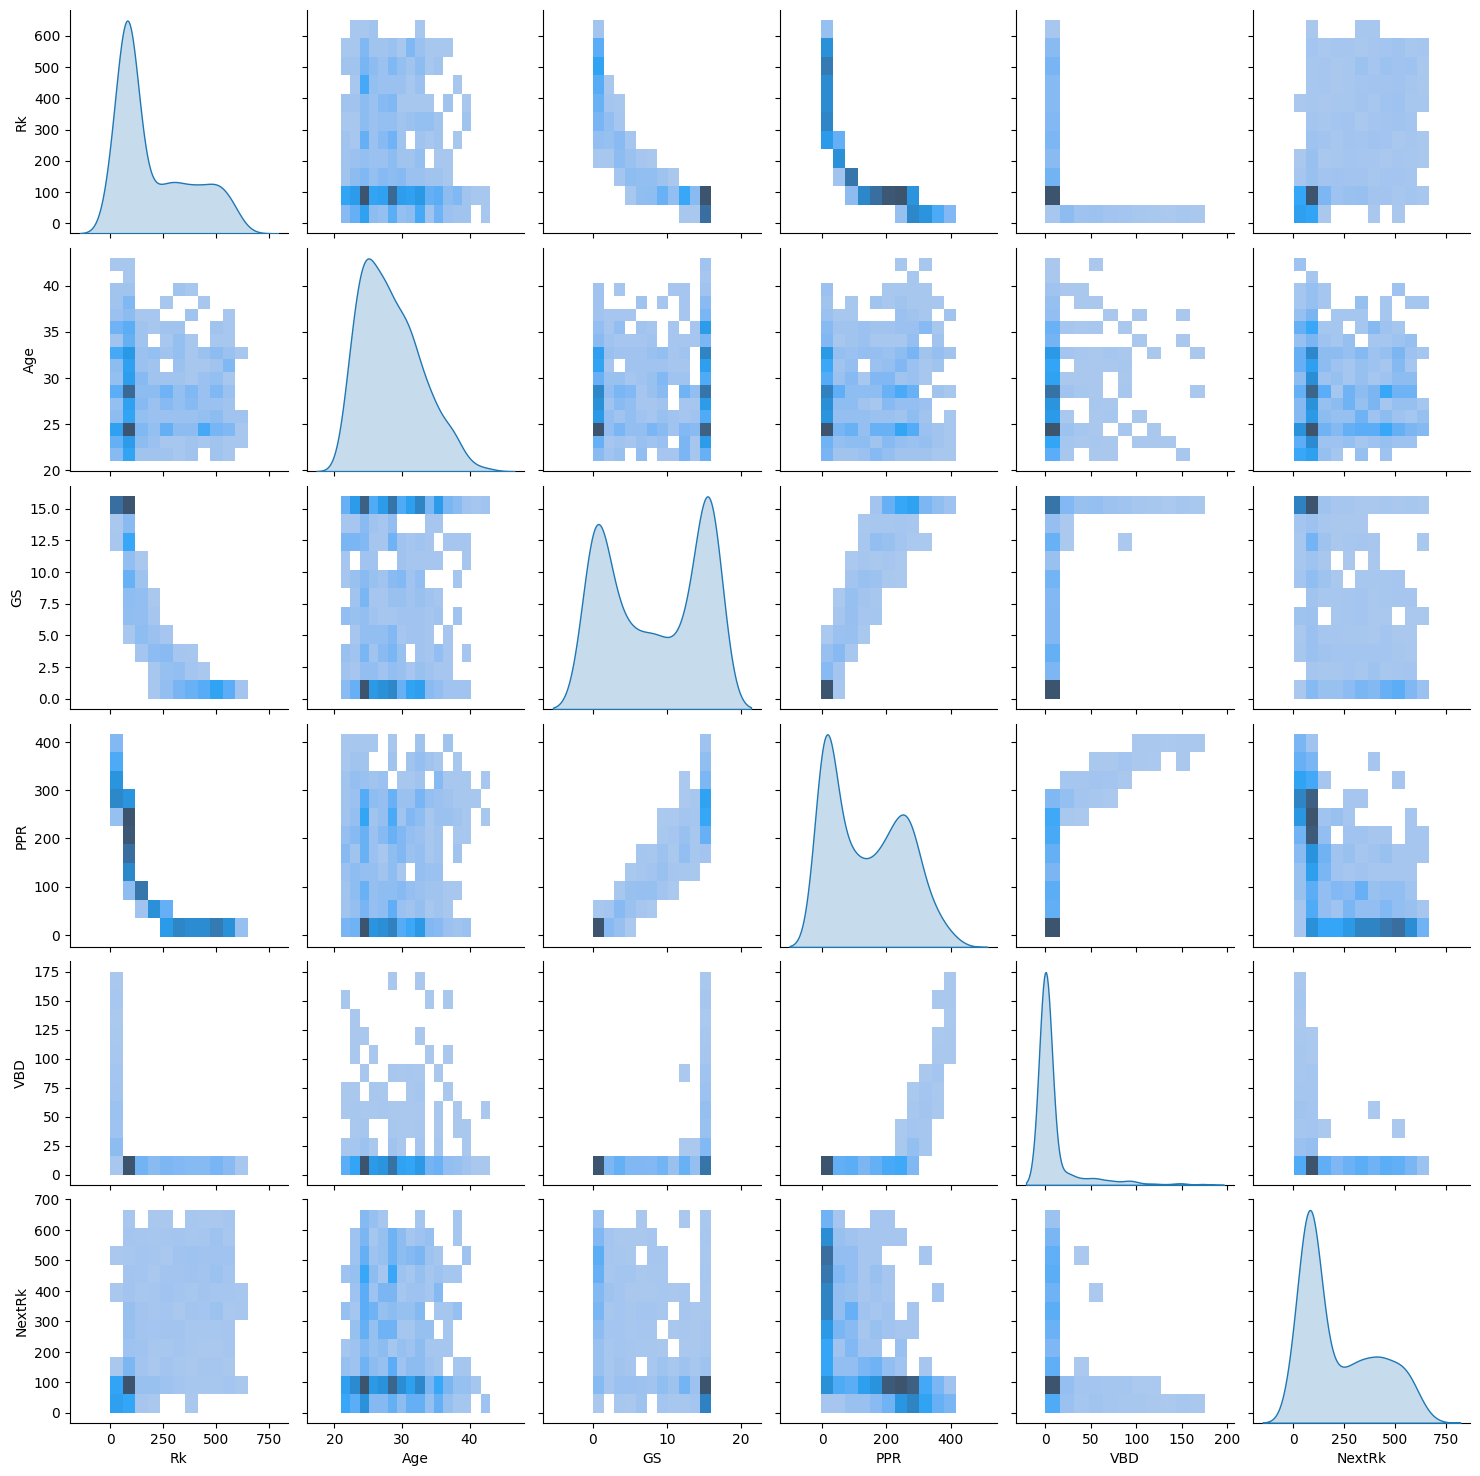

In [ ]:
positions = ['FantPos_Other', 'FantPos_WR', 'FantPos_RB', 'FantPos_TE', 'FantPos_QB']

for pos in positions:
  sns.pairplot(train[train[pos] == 1], vars=['Rk', 'Age', 'GS', 'PPR', 'VBD', 'NextRk'], kind='hist', diag_kind='kde')

In [8]:
test.to_csv('/content/drive/MyDrive/fantasy_football/test_2021.csv', index=False)
train.to_csv('/content/drive/MyDrive/fantasy_football/train_2010-2020.csv', index=False)

In [7]:
predict.to_csv('/content/drive/MyDrive/fantasy_football/predict_2022.csv', index=False)